In [ ]:
%pip install mne

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import mne
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from mne.io import RawArray
from mne import create_info

In [ ]:
matplotlib.use('Qt5Agg')

In [ ]:
# Load data from the text file
data = np.loadtxt('Normal/D0000002.TXT')

# Define the sampling rate
sampling_rate = 250  # Replace with your actual sampling rate

# Create the channel names
# channel_names = [f'EEG {i+1}' for i in range(data.shape[1])]
channel_names = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4',
                 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6',
                 'Fz', 'Cz', 'Pz']

# Create the info structure
info = create_info(channel_names, sfreq=sampling_rate, ch_types='eeg')

# Create the raw object
raw = RawArray(data.T, info)

# Save as .fif file
raw.save('converted_data.fif', overwrite=True)
raw

Creating RawArray with float64 data, n_channels=19, n_times=47736
    Range : 0 ... 47735 =      0.000 ...   190.940 secs
Ready.
Overwriting existing file.
Writing c:\Users\David Atanasoski\Desktop\isgp-seminarska\converted_data.fif
Closing c:\Users\David Atanasoski\Desktop\isgp-seminarska\converted_data.fif
[done]


C:\Users\David Atanasoski\AppData\Local\Temp\ipykernel_26432\2208216123.py:20: RuntimeWarning: This filename (c:\Users\David Atanasoski\Desktop\isgp-seminarska\converted_data.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save('converted_data.fif', overwrite=True)


<RawArray | 19 x 47736 (190.9 s), ~6.9 MB, data loaded>

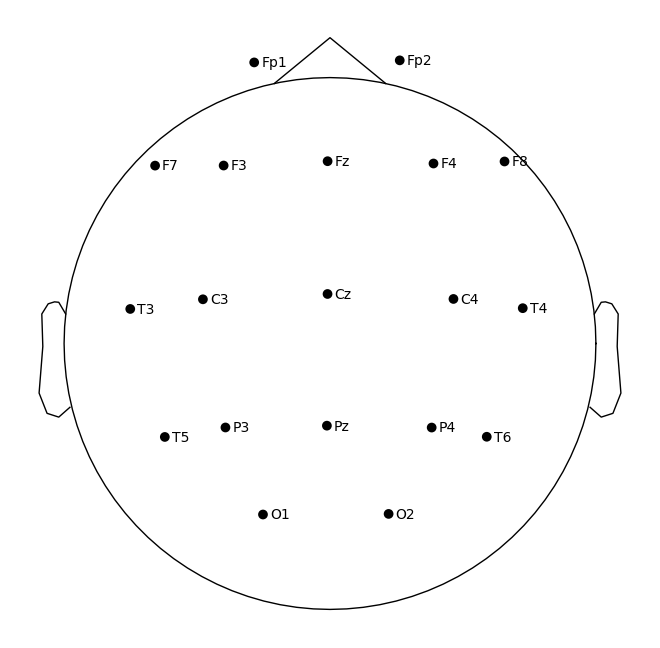

In [ ]:
%matplotlib inline

# Load sensor positions (montage)
montage = mne.channels.make_standard_montage('standard_1005')

# Set the montage to the raw data
raw.set_montage(montage)

# Plot sensor locations
raw.plot_sensors(show_names=True);

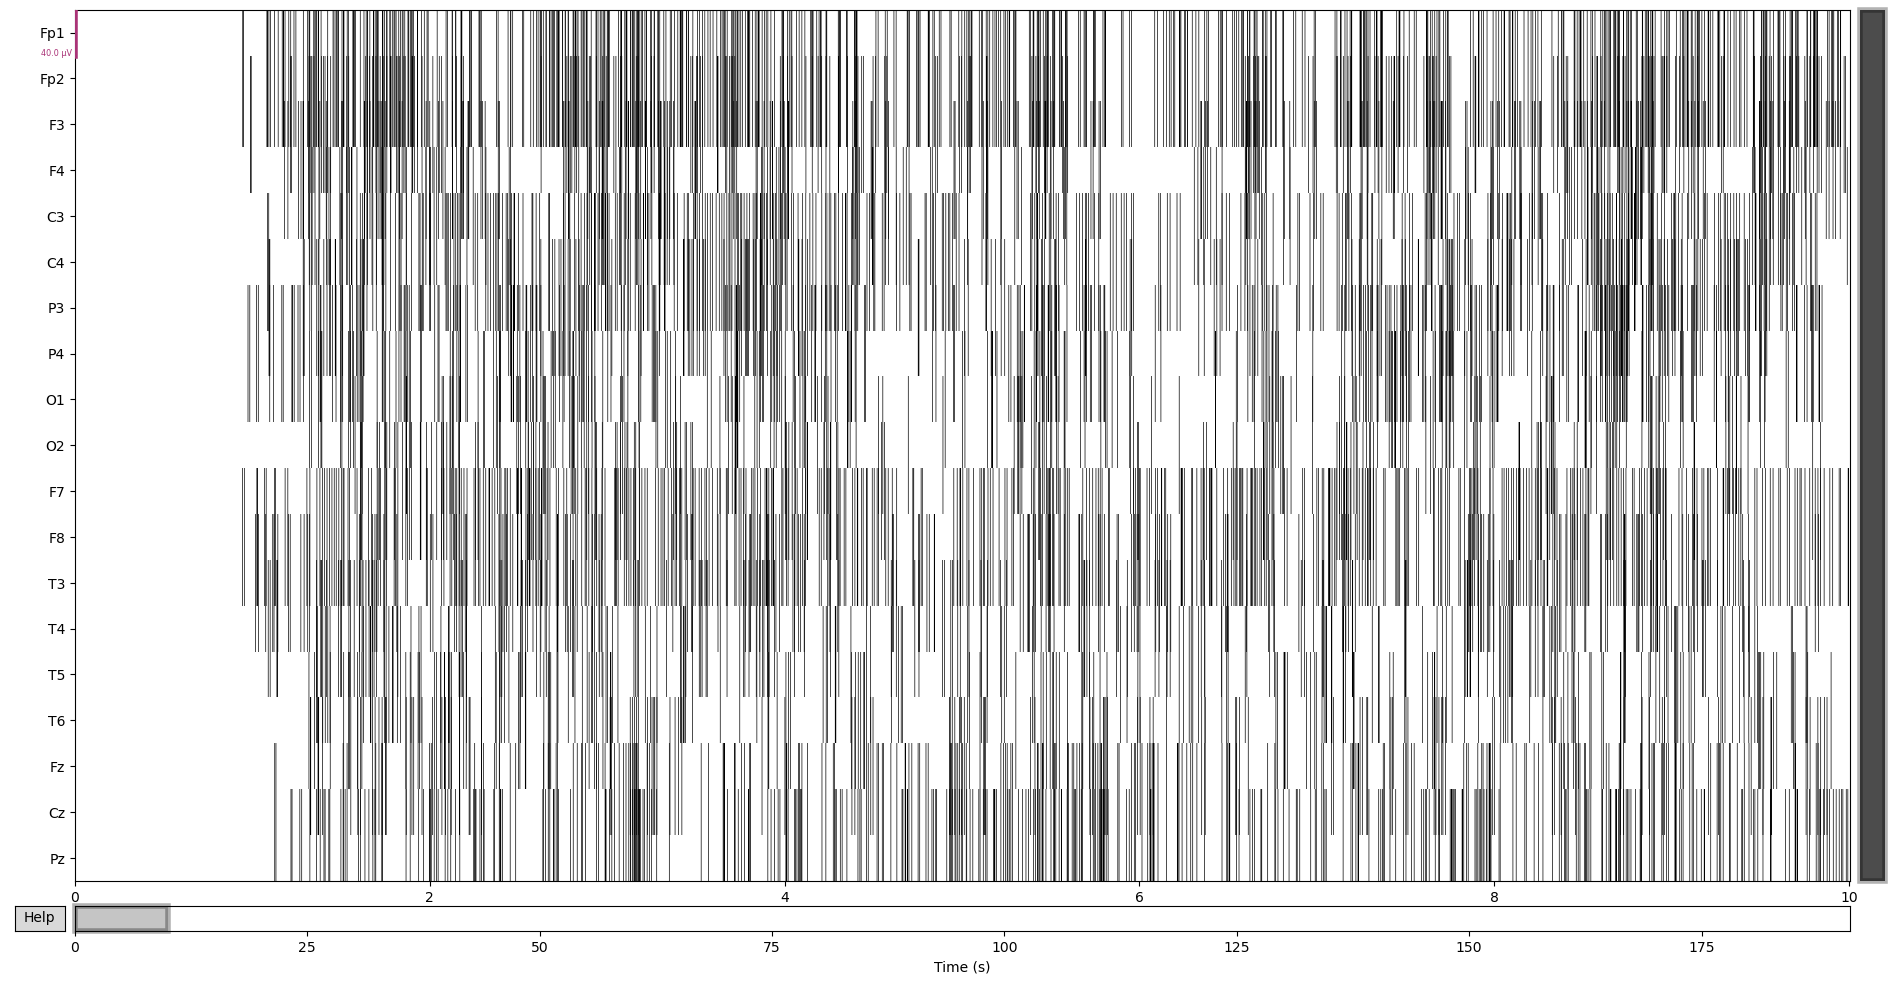

In [ ]:
# Without filtering and scaling
raw.plot();

In [ ]:
# Applying a band-pass filter
raw.filter(l_freq=1, h_freq=30)

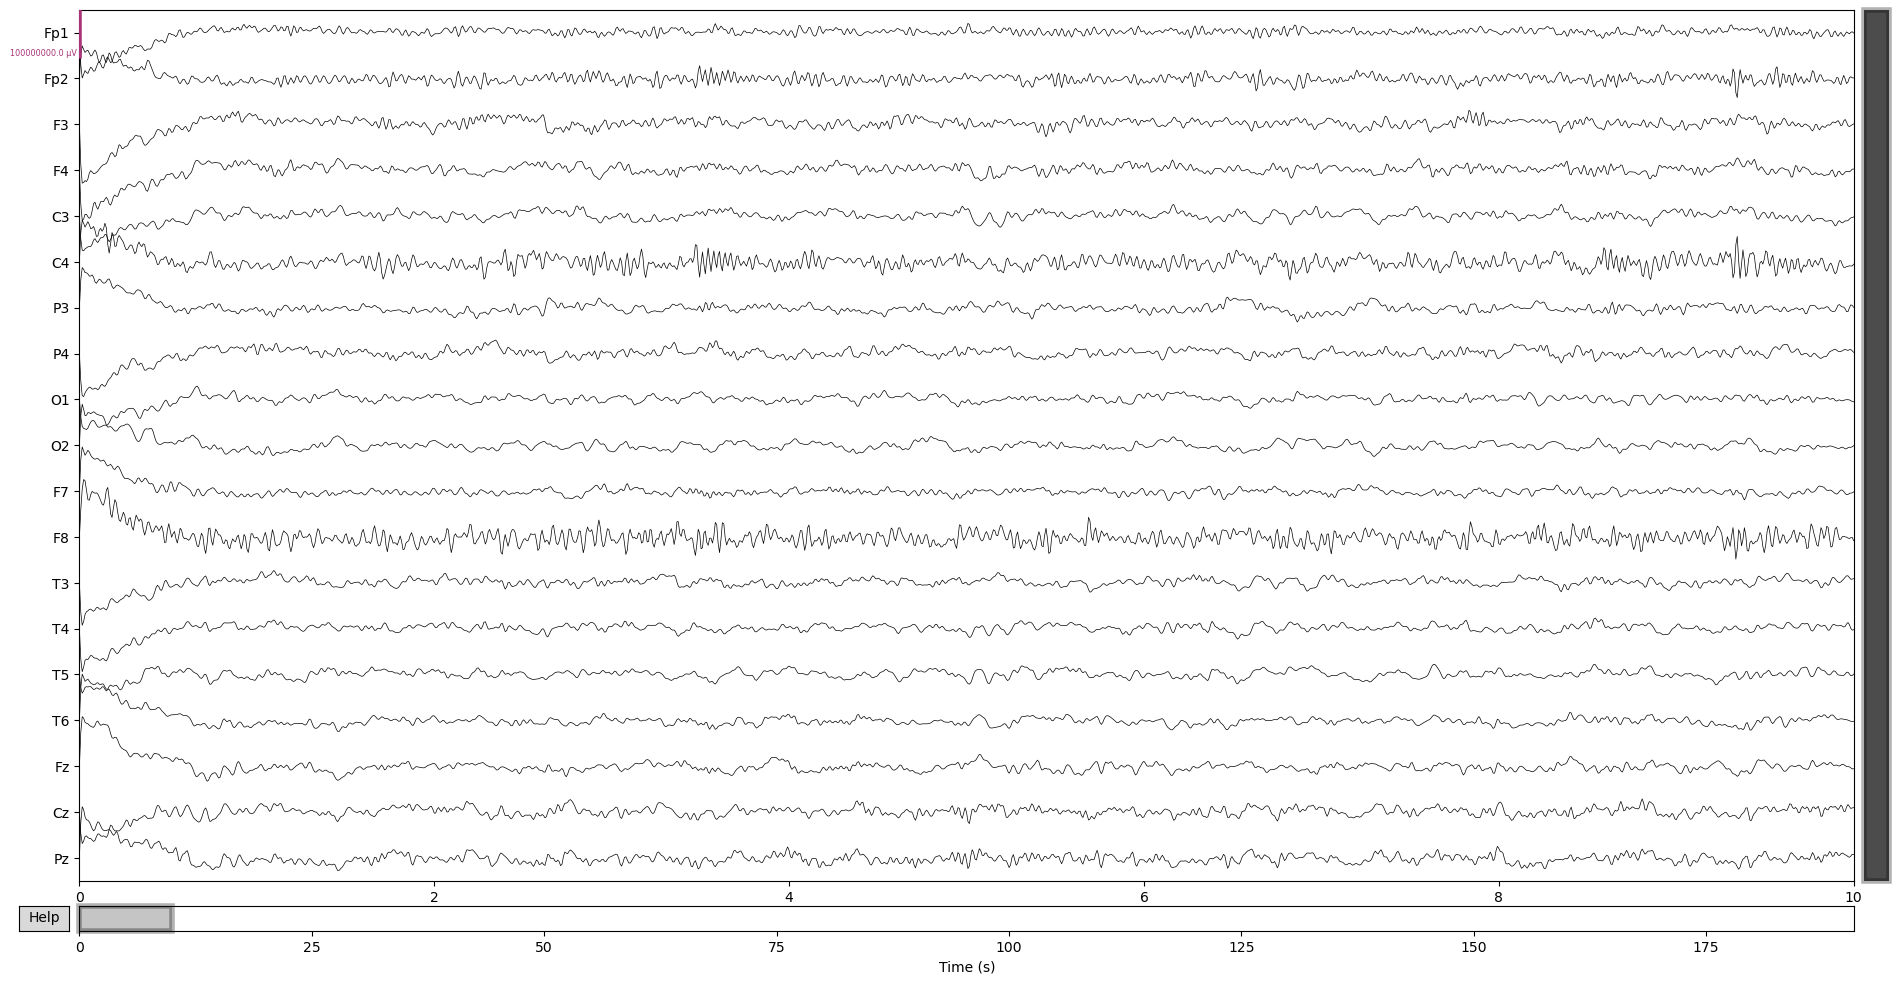

In [ ]:
def plot_scaled(raw):
    # Adjust the scaling factor for specific channels
    scalings = {'eeg': 50, 'stim': 0.1}  # Example custom scaling factors
    raw.plot(scalings=scalings);

plot_scaled(raw)

In [ ]:
ica = mne.preprocessing.ICA(n_components=19, random_state=0)

In [ ]:
ica.fit(raw.copy().filter(8, 40))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (1.652 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 19 components


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


Fitting ICA took 0.8s.


C:\Users\David Atanasoski\AppData\Local\Temp\ipykernel_26432\1014783266.py:1: RuntimeWarning: Using n_components=19 (resulting in n_components_=19) may lead to an unstable mixing matrix estimation because the ratio between the largest (4.5) and smallest (5.1e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 18
  ica.fit(raw.copy().filter(8, 40))


Method,fastica
Fit,40 iterations on raw data (47736 samples)
ICA components,19
Available PCA components,19
Channel types,eeg
ICA components marked for exclusion,—


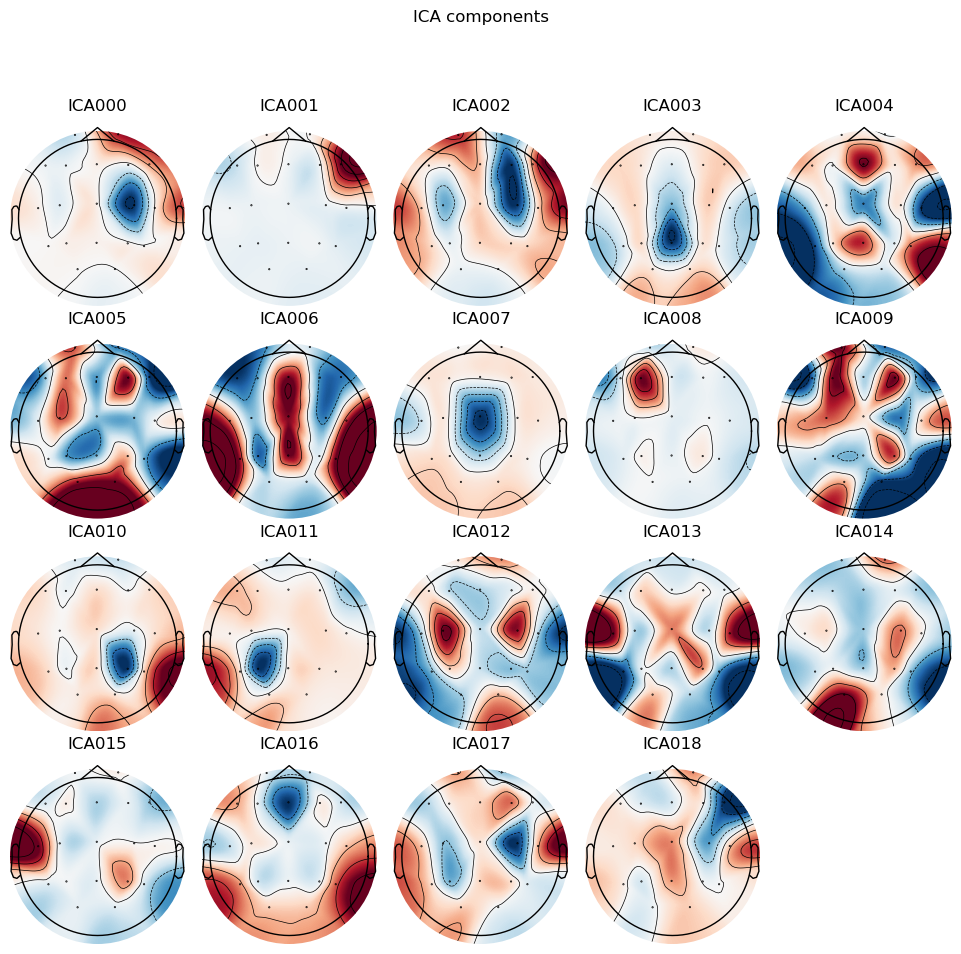

In [ ]:
ica.plot_components();

Applying ICA to Raw instance
    Transforming to ICA space (19 components)
    Zeroing out 5 ICA components
    Projecting back using 19 PCA components


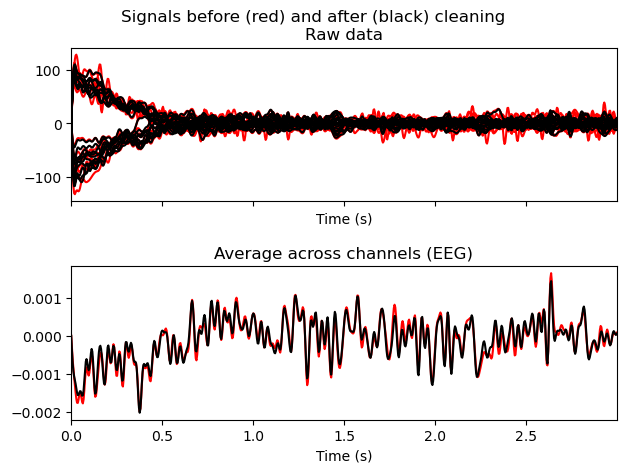

In [ ]:
ica.exclude = [0, 1, 3, 7, 8] # indices chosen based on the above plot that contains least noise
                                # and are probably an eye movement (blinks)
ica.plot_overlay(raw, exclude=ica.exclude);

In [ ]:
# Docs: https://mne.tools/dev/generated/mne.preprocessing.ICA.html#mne.preprocessing.ICA.find_bads_eog

bad_idx, scores = ica.find_bads_eog(raw, ch_name='Fp1', threshold=2) # What channel to use for EOG?
print(bad_idx)

Using EOG channel: Fp1
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (19 components)
    Zeroing out 5 ICA components
    Projecting back using 19 PCA components


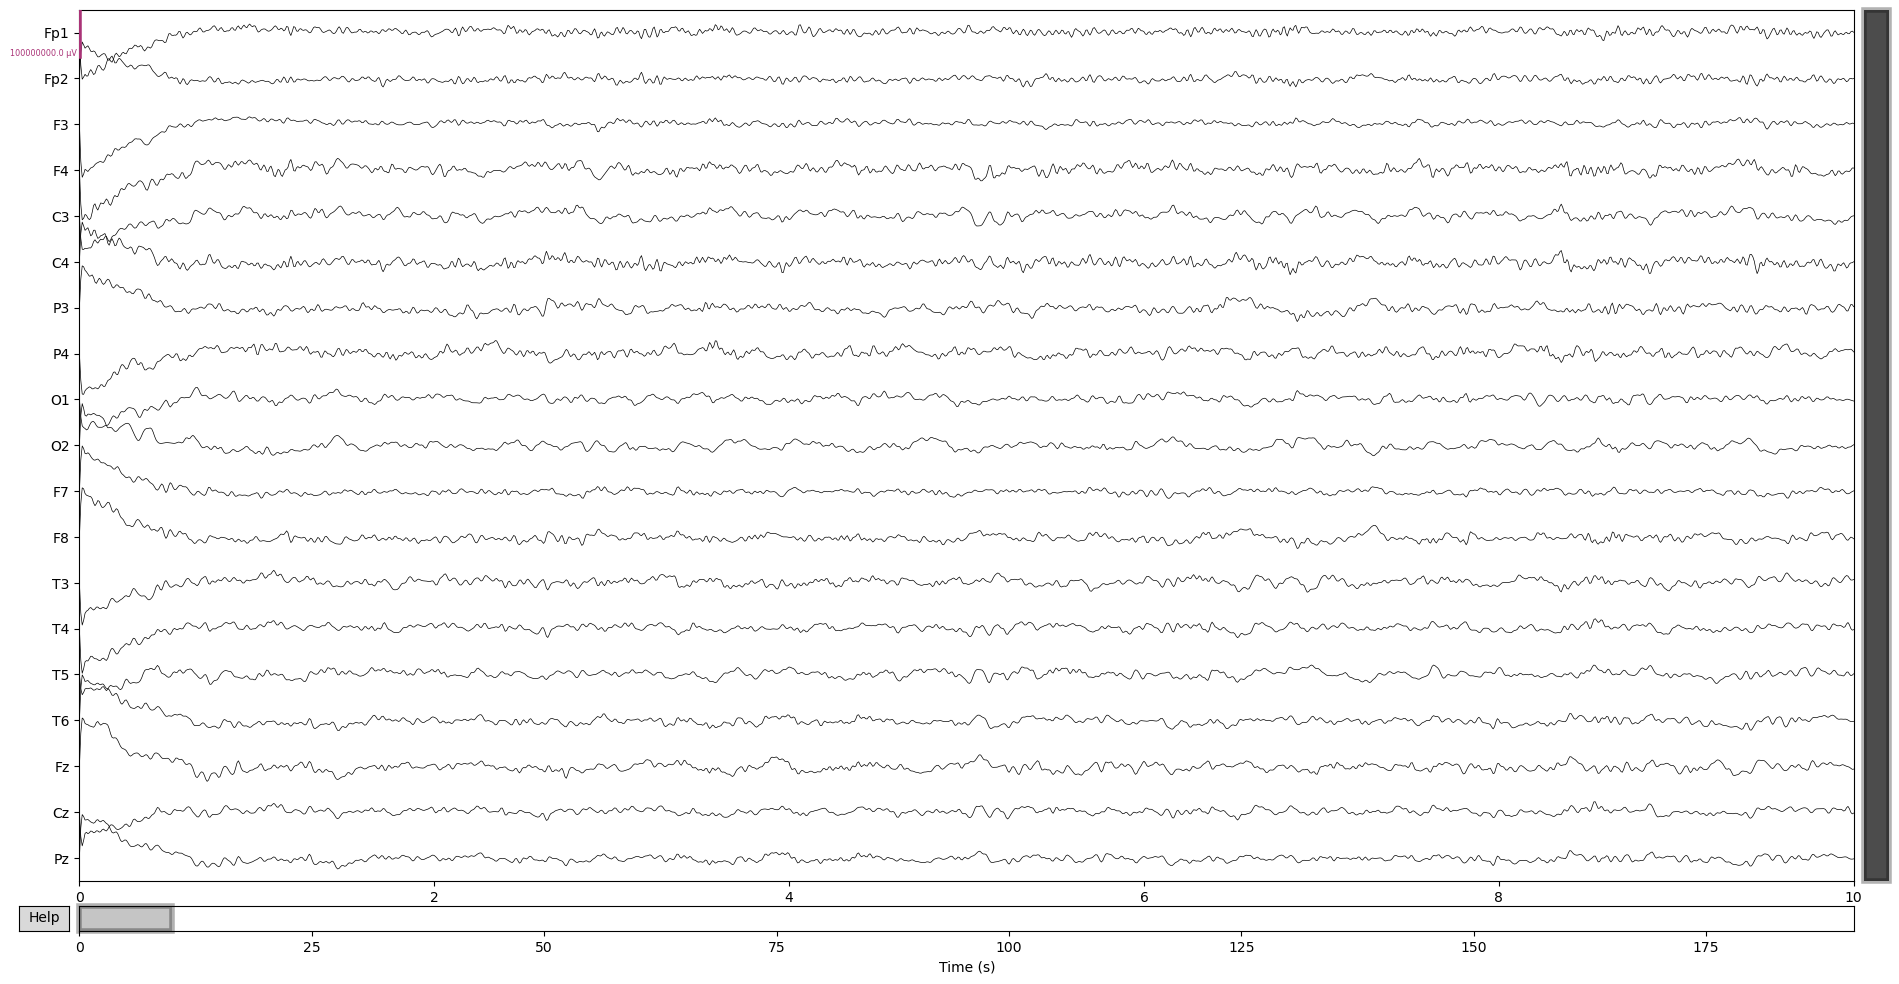

In [ ]:
# Here we exclude the above "found bad components" and the plot looks different (a bit)
ica.apply(raw.copy(), exclude=ica.exclude).plot(scalings={'eeg': 50, 'stim': 0.1});